In [2]:
import tensorflow as tf
from tensorflow.keras import models , layers 
import matplotlib.pyplot as plt

In [92]:
IMAGE_SIZE = 256 
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 5

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage" ,
    shuffle = True , 
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
68*32

2176

In [11]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 2 0]


In [25]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(image_batch[0].numpy())
    

(256, 256, 3)
[[[160. 157. 176.]
  [155. 152. 171.]
  [152. 149. 168.]
  ...
  [139. 126. 143.]
  [117. 104. 121.]
  [115. 102. 119.]]

 [[163. 160. 179.]
  [160. 157. 176.]
  [157. 154. 173.]
  ...
  [131. 118. 135.]
  [ 93.  80.  97.]
  [144. 131. 148.]]

 [[162. 159. 178.]
  [161. 158. 177.]
  [161. 158. 177.]
  ...
  [107.  94. 111.]
  [106.  93. 110.]
  [167. 154. 171.]]

 ...

 [[169. 163. 175.]
  [190. 184. 196.]
  [177. 171. 183.]
  ...
  [132. 116. 127.]
  [131. 115. 126.]
  [111.  95. 106.]]

 [[132. 126. 138.]
  [162. 156. 168.]
  [158. 152. 164.]
  ...
  [152. 136. 147.]
  [126. 110. 121.]
  [ 67.  51.  62.]]

 [[174. 168. 180.]
  [183. 177. 189.]
  [177. 171. 183.]
  ...
  [119. 103. 114.]
  [145. 129. 140.]
  [115.  99. 110.]]]


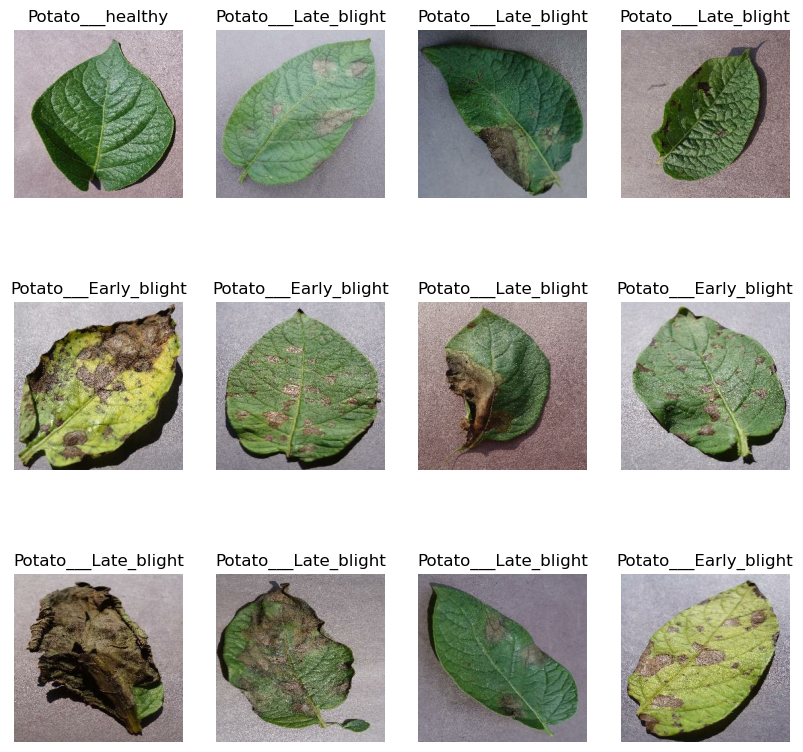

In [42]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3 , 4 ,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [54]:
# 80 % = = > training 
# 20 % = = > [10% validation , 10% test ]
len(dataset)

68

In [55]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [56]:
train_ds = dataset.take(54)
len(train_ds)

54

In [57]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [58]:
val_ds = 0.1
len(dataset) * val_ds

6.800000000000001

In [59]:
val_ds = dataset.take(6)
len(val_ds)

6

In [61]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [64]:
def get_dataset_partitions_tf(ds , train_split = 0.8 , val_split= 0.1 , test_split = 0.1 , shuffle = True , shuffle_size=10000):
    ds_size = len(ds)
    if shuffle :
        ds = ds.shuffle(shuffle_size , seed = 12 )
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds , test_ds


In [65]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [66]:
len(train_ds)

54

In [67]:
len(val_ds)

6

In [68]:
len(test_ds)

8

In [69]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [71]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE , IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255 )
])

In [77]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [79]:
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNEL)
n_classes = 3
##Flatten layer is used to make the multidimensional input one-dimensional, commonly used in the transition 
##from the convolution layer to the full connected layer.
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32 , (3,3) , activation="relu" , input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='relu' ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='relu' ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes , activation='softmax'),
    ##softmax will be normalized the probability of the classes
])
model.build(input_shape=input_shape)

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [81]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [93]:
history= model.fit( 
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE , 
    verbose = 1 , 
    validation_data=val_ds
)    

Epoch 1/5
54/54 [==============================] - 451s 8s/step - loss: 0.7351 - accuracy: 0.6829 - val_loss: 0.5763 - val_accuracy: 0.8021
Epoch 2/5
54/54 [==============================] - 508s 9s/step - loss: 0.4760 - accuracy: 0.7980 - val_loss: 0.3146 - val_accuracy: 0.8750
Epoch 3/5
54/54 [==============================] - 462s 9s/step - loss: 0.2764 - accuracy: 0.8958 - val_loss: 0.3802 - val_accuracy: 0.8229
Epoch 4/5
54/54 [==============================] - 484s 9s/step - loss: 0.2260 - accuracy: 0.9178 - val_loss: 0.2720 - val_accuracy: 0.9167
Epoch 5/5
54/54 [==============================] - 459s 8s/step - loss: 0.1898 - accuracy: 0.9207 - val_loss: 0.1439 - val_accuracy: 0.9531


In [94]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 26s 2s/step - loss: 0.1428 - accuracy: 0.9492


In [95]:
scores

[0.1427748054265976, 0.94921875]

In [96]:
history

In [97]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [98]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [99]:
history.history['accuracy'] 

[0.6828703880310059,
 0.7980324029922485,
 0.8958333134651184,
 0.9178240895271301,
 0.9207175970077515]

In [100]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 

loss= history.history['loss'] 
val_loss = history.history['val_loss'] 

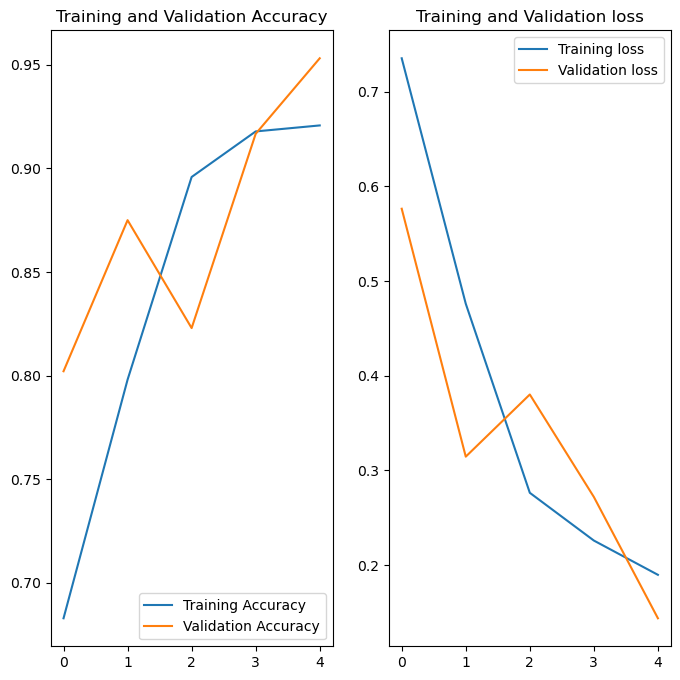

In [105]:
plt.figure(figsize=(8 ,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc , label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc , label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss , label = 'Training loss')
plt.plot(range(EPOCHS), val_loss , label = 'Validation loss')
plt.legend(loc='upper right')
plt.title("Training and Validation loss")
plt.show()

first image to predict :
actual label : Potato___Early_blight
1/1 [==============================] - 3s 3s/step
predicted label :  Potato___Early_blight


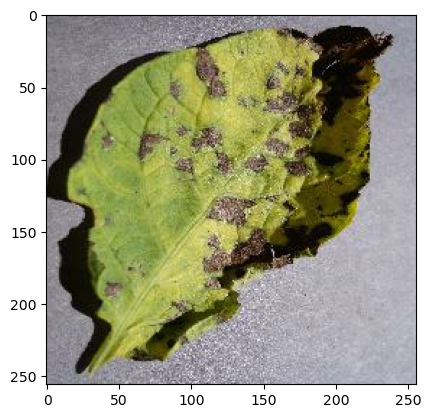

In [109]:
import numpy as np

for image_batch , label_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print('first image to predict :')
    plt.imshow(first_image)
    print("actual label :" , class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print('predicted label : ' , class_names[np.argmax(batch_prediction[0])])

In [117]:
def predict (model , img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array ,0)#create batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.argmax(predictions[0])) , 2 )
    return predicted_class , confidence 

1/1 [==============================] - 0s 143ms/step


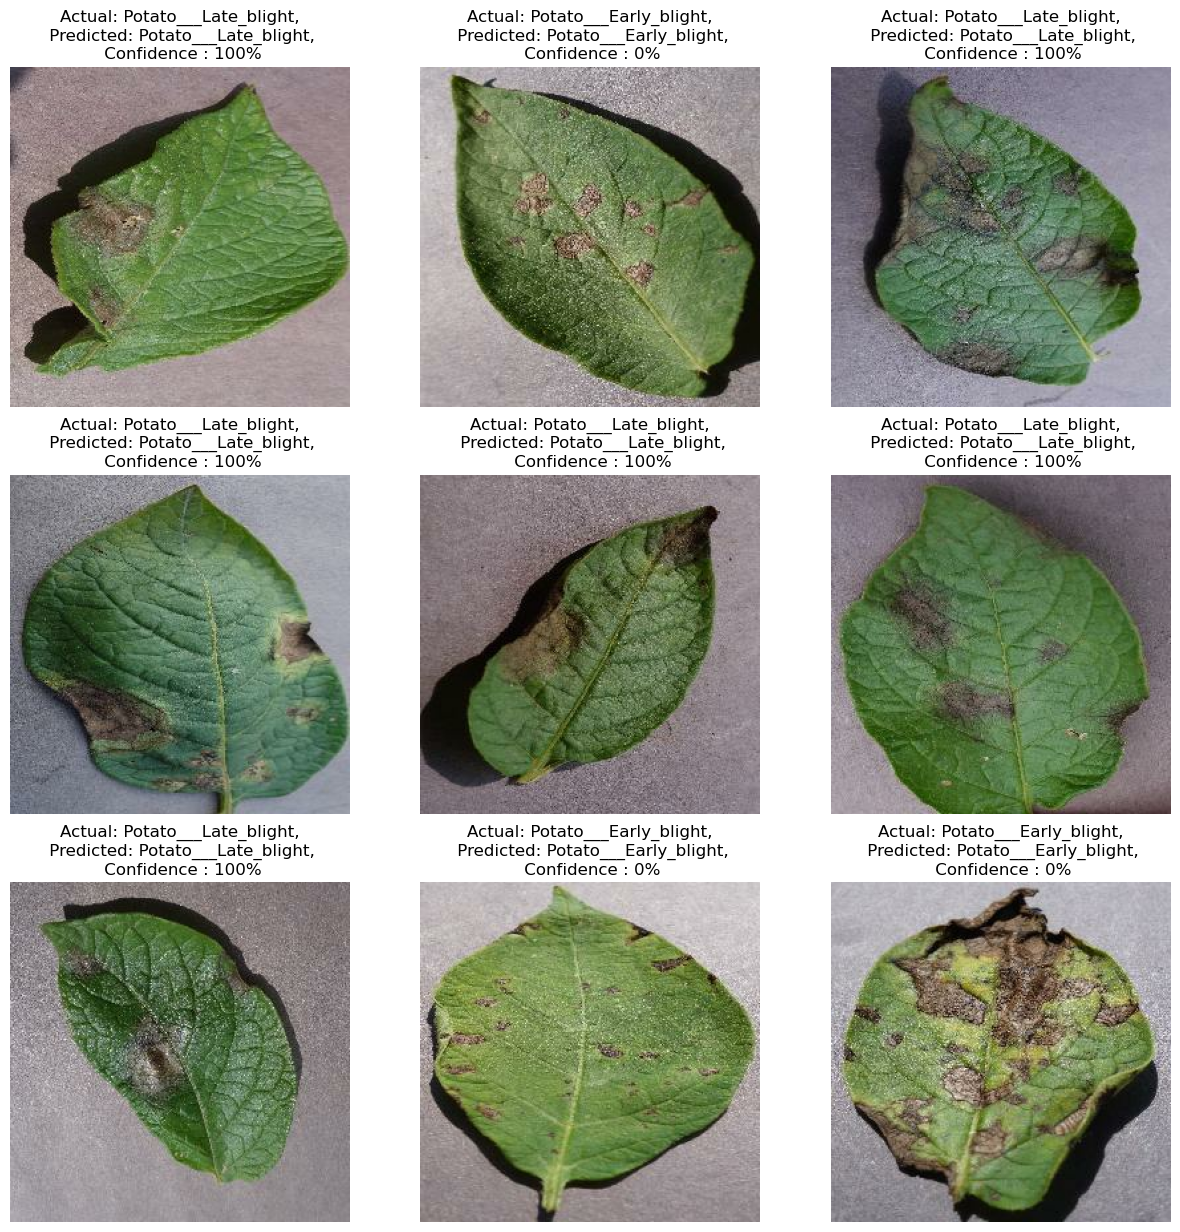

In [118]:
plt.figure(figsize=(15 , 15))
for images , labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3 , 3 , i+1 )
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class , confidence = predict(model , images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence : {confidence}%")
         
        plt.axis('off')
        
        

In [122]:
model_version = 1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets
